# 5.1 - SENTIMENT ANALYSIS - *k-clique*

Per eseguire l'analisi dei tweet scritti dagli utenti nelle comunità identificate con l'algoritmo **k-clique** sul processo di Johnny Depp e Amber Heard verrà utilizzato il modello **VADER ( Valence Aware Dictionary for Sentiment Reasoning)**, sensibile sia alla polarità (positivo/negativo) che all'intensità dell'emozione.

In [4]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords 

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
nltk.download('stopwords')
sentiment = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aliis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# K-CLIQUES

**COMUNITÀ 0**

In [5]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df = pd.read_csv('data/df_kclique_coms_0.csv')
del df['Unnamed: 0']

**COMUNITÀ 1**

In [24]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df1 = pd.read_csv('data/df_kclique_coms_1.csv')
del df1['Unnamed: 0']

In [6]:
df['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df['tweet'].astype(str)]
df['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df['tweet'].astype(str)]
df['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df['tweet'].astype(str)]
df['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df['tweet'].astype(str)]

In [7]:
df.head()

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos
0,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,"['elaine', 'opening', 'statement', 'smeared', ...",1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000
1,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,"['elaine', 'opening', 'statement', 'smeared', ...",1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000
2,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,"['elaine', 'opening', 'statement', 'smeared', ...",1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000
3,2022-04-13,16563753,joleonard___x,𝒥𝑜 . 🤜🏻🥊,issac baruch lady gentleman 😂 👏🏻 shout andysig...,"[{'screen_name': 'andysignore', 'name': 'andy ...",0,0,3,deppvsheard popcornedplanet,...,"['issac', 'baruch', 'lady', 'gentleman', '😂', ...",1,10,71,6.200000,NaN,0.0000,0.000,1.000,0.000
4,2022-04-14,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,cream 🤣🤣🤣 fix broken nose shark bite omg 🤣🤣🤣 c...,"[{'screen_name': 'petergilmoreart', 'name': 'p...",0,2,5,amicacream deppvheard deppvsheard,...,"['cream', '🤣🤣🤣', 'fix', 'broken', 'nose', 'sha...",1,12,87,5.285714,NaN,-0.5574,0.313,0.556,0.131


In [8]:
#imposto le soglie
df['sentimenti']=''
df.loc[df.compound > 0,'sentimenti']='POSITIVO'
df.loc[df.compound == 0,'sentimenti']='NEUTRALE'
df.loc[df.compound < 0,'sentimenti']='NEGATIVO'

In [11]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000,NEUTRALE
1,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000,NEUTRALE
2,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000,NEUTRALE
3,2022-04-13,16563753,joleonard___x,𝒥𝑜 . 🤜🏻🥊,issac baruch lady gentleman 😂 👏🏻 shout andysig...,"[{'screen_name': 'andysignore', 'name': 'andy ...",0,0,3,deppvsheard popcornedplanet,...,1,10,71,6.200000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
4,2022-04-14,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,cream 🤣🤣🤣 fix broken nose shark bite omg 🤣🤣🤣 c...,"[{'screen_name': 'petergilmoreart', 'name': 'p...",0,2,5,amicacream deppvheard deppvsheard,...,1,12,87,5.285714,NaN,-0.5574,0.313,0.556,0.131,NEGATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11764,2022-06-11,15571195,vipvirtualsols,✨Alexandra✨,petition remove ambassador woman right g u n g 💩,[],1,5,9,amberheard aclu amberheardlsanabuser amberhea...,...,1,9,48,3.900000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
11765,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,breaking next role confirmed 💩🤡,[],0,0,7,amberheard aquaman aquamanandthelostkingdom a...,...,1,5,31,5.400000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
11766,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,yes admitted blackmail setup hoax still believ...,[],0,2,11,amberheardlsanabuser amberheardlsaliar amberh...,...,1,12,79,5.666667,NaN,0.2500,0.138,0.592,0.270,POSITIVO
11767,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,thickened plot 💩💩💩continues 🤔,[],0,1,2,amberheardlsanabuser amberheardlsaliar amberh...,...,1,4,29,6.500000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE


In [12]:
df["sentimenti"].value_counts()

NEGATIVO    4405
POSITIVO    4308
NEUTRALE    3056
Name: sentimenti, dtype: int64

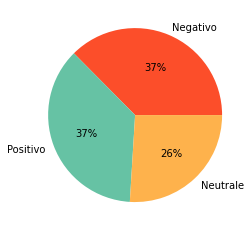

In [13]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df["sentimenti"].value_counts()
plt.pie(data, colors = colors, autopct='%.0f%%', labels = labels)
plt.savefig('img/sentiment_analysis/kc0_pieplt.png')
plt.show()

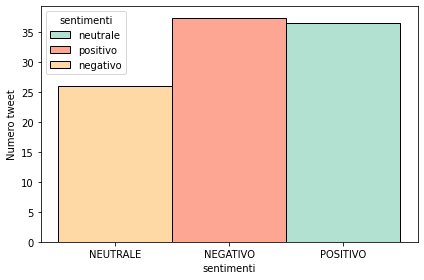

In [14]:
sns.set_palette("Set2")
colors = ['#feb24c', '#fc4e2a', "#66c2a4"]
sns.histplot(x="sentimenti", data=df, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('img/sentiment_analysis/kc0_barplt.png')
plt.show()

In [15]:
tok_pos = ' '.join(df[df['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
tok_pos

['winner',
 'trial',
 'tired',
 '😔',
 'courttvuk',
 'courttv',
 'chanleycourttv',
 'lovelincoln',
 'welcome',
 'yes',
 'need',
 'speak',
 'defense',
 'johnny',
 'depp',
 'amaralforte',
 'ordained',
 'deacon',
 'daughter',
 'survivor',
 'pray',
 'god',
 'johnny',
 'depp',
 'win',
 'amber',
 'heard',
 'loses',
 '🙏🏽',
 'believe',
 'wish',
 'tomorrow',
 'monday',
 'could',
 'keep',
 'going',
 'trial',
 'tweet',
 'support',
 'male',
 'survivor',
 '💜',
 'seeing',
 'testimony',
 'hit',
 'many',
 'trait',
 'seeing',
 'hour',
 'flowery',
 'speech',
 'manipulation',
 'narrative',
 'sure',
 'attention',
 'survivor',
 'tweet',
 'support',
 'johnny',
 'depp',
 'attention',
 'elon',
 'musk',
 'elonmusk',
 'speak',
 'behalf',
 'johnny',
 'depp',
 'might',
 'score',
 'point',
 'real',
 'survivor',
 'yes',
 'except',
 'commit',
 'level',
 'narcissistic',
 'enough',
 'believe',
 'acting',
 'skill',
 'fool',
 'u',
 'good',
 'thing',
 'today',
 'well',
 'truly',
 'proven',
 'wrong',
 'new',
 'narrative',


In [16]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber      918
heard      451
johnny     449
depp       438
witness    313
courttv    275
good       266
trial      258
friend     249
team       229
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

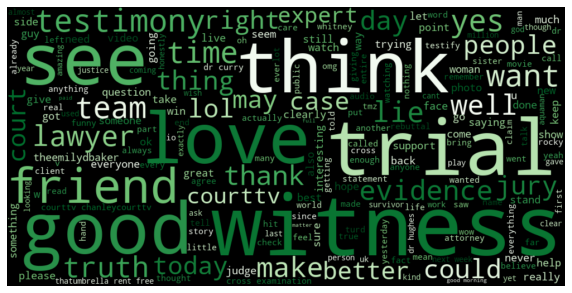

In [17]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])
tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/kc0_wc_pos.png')
plt.axis('off')

In [18]:
tok_neg= ' '.join(df[df['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
tok_neg

['cream',
 '🤣🤣🤣',
 'fix',
 'broken',
 'nose',
 'shark',
 'bite',
 'omg',
 '🤣🤣🤣',
 'credit',
 'petergilmoreart',
 'cry',
 'andysignore',
 '🤣🤣🤣',
 'great',
 'job',
 'amber',
 'team',
 'trying',
 'prove',
 'johnny',
 'raging',
 'druggie',
 'blackout',
 'angry',
 'violent',
 'abuser',
 'doctor',
 'testified',
 'spending',
 'majority',
 'time',
 'placating',
 'sick',
 'withdrawing',
 'drug',
 'trying',
 'detox',
 'great',
 'job',
 'amber',
 'team',
 'trying',
 'prove',
 'johnny',
 'raging',
 'druggie',
 'blackout',
 'angry',
 'violent',
 'abuser',
 'doctor',
 'testified',
 'spending',
 'majority',
 'time',
 'placating',
 'sick',
 'withdrawing',
 'drug',
 'trying',
 'detox',
 'moral',
 'conscience',
 'right',
 'condemning',
 'amber',
 'heard',
 'abuse',
 'johnny',
 'depp',
 'amber',
 'heard',
 'guilty',
 'abusing',
 'johnny',
 'depp',
 'change',
 'mind…',
 'watch',
 'unfold',
 'getting',
 'feeling',
 'may',
 'planning',
 'collect',
 'negative',
 'stuff',
 'depp',
 'instigator',
 'agitator',


In [19]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        1099
heard         621
johnny        449
depp          441
witness       334
make          259
time          258
testimony     258
see           245
jury          236
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

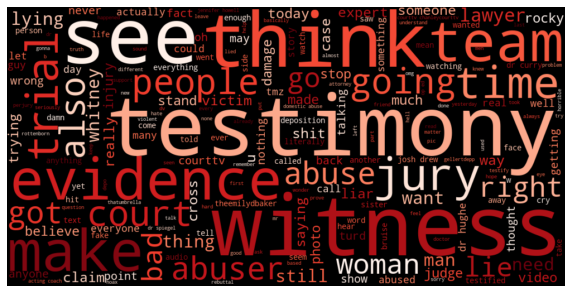

In [20]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])
tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/kc0_wc_neg.png')
plt.axis('off')

In [21]:
tok_neu= ' '.join(df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['elaine',
 'opening',
 'statement',
 'smeared',
 'making',
 'rambling',
 'reception',
 'carrying',
 'elaine',
 'opening',
 'statement',
 'smeared',
 'making',
 'rambling',
 'reception',
 'carrying',
 'elaine',
 'opening',
 'statement',
 'smeared',
 'making',
 'rambling',
 'reception',
 'carrying',
 'issac',
 'baruch',
 'lady',
 'gentleman',
 '😂',
 '👏🏻',
 'shout',
 'andysignore',
 'clip',
 'popcornedplanet',
 '💩🤮🤡⚰️🔚',
 'johnny',
 'depp',
 'need',
 'more…',
 'amber',
 'heard',
 'dna',
 'test',
 'came',
 'back',
 'stool',
 'le',
 '💩',
 'amber',
 'heard',
 'still',
 'career',
 'johnny',
 'depp',
 'calling',
 'middle',
 'finger',
 'little',
 'richard',
 'johnny',
 'depp',
 'thing',
 '😂',
 'johnny',
 'depp',
 'trial',
 'outtake',
 'priceless',
 'nessaaaevans',
 'gellertdepp',
 'quickly',
 'amber',
 'heard',
 'heals',
 'literally',
 'every',
 'single',
 'statement',
 'testimony',
 'given',
 'different',
 'utterly',
 'past',
 'present',
 'future',
 'oh',
 'trying',
 'pas',
 'pic',
 '😂',
 'gi

In [22]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber             455
heard             280
courttv           237
johnny            215
depp              208
chanleycourttv    172
witness           146
dr                144
trial             139
time              136
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

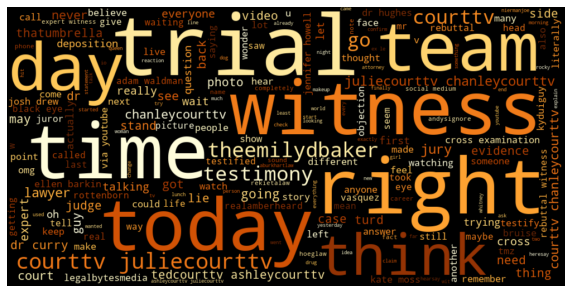

In [23]:
stopw2 = stopwords.words('english') 
stopw2.extend(['jd', 'get', 'like', 'know', 'use', 'ah', 'one', 'say', 'look', 'even', 'said', 'would', 'amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])
tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/kc0_wc_neu.png')
plt.axis('off')

In [25]:
df1

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,Unnamed: 0.1,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f
0,2022-04-27,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,newsweek depp testimony damning sorry chose dr...,[],1,0,1,deppvsheard amberheardputupwithalot growupdepp,"[{'screen_name': 'Newsweek', 'name': 'Newsweek...",NaN,"['newsweek', 'depp', 'testimony', 'damning', '...",1,18,114,5.388889,NaN
1,2022-05-07,26282046,hlntv,HLN,hln legal analyst joeyjacksonesq say call test...,"[{'screen_name': 'joeyjacksonesq', 'name': 'jo...",5,3,18,amberheard deppvsheard,[],NaN,"['hln', 'legal', 'analyst', 'joeyjacksonesq', ...",1,17,130,6.705882,NaN
2,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,sunstroke house msg amber speak appears violen...,[],1,0,1,deppvsheard amberheard johnnydeppisnosaint,"[{'screen_name': 'sunstroke_house', 'name': 'S...",NaN,"['sunstroke', 'house', 'msg', 'amber', 'speak'...",1,11,70,5.454545,amber
3,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,sunstroke house wanted fair trial testified ab...,[],1,0,7,deppvsheard,"[{'screen_name': 'sunstroke_house', 'name': 'S...",NaN,"['sunstroke', 'house', 'wanted', 'fair', 'tria...",1,13,88,5.846154,NaN
4,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,earthglows total silliness doubt violent flew ...,[],1,0,9,depp deppvsheard johnnydeppvsamberheard johnn...,"[{'screen_name': 'EarthGlows', 'name': 'Courtn...",NaN,"['earthglows', 'total', 'silliness', 'doubt', ...",1,11,72,5.636364,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,2022-06-12,1497397049154801664,catwoman_1111,cat,laurabockov thank god televised lawcrimenetwor...,"[{'screen_name': 'lawcrimenetwork', 'name': 'l...",0,0,0,johnnydeppamberheardtrial,"[{'screen_name': 'LauraBockov', 'name': 'TheRe...",2570.0,"['laurabockov', 'thank', 'god', 'televised', '...",1,24,211,7.480000,NaN
3371,2022-06-12,1497397049154801664,catwoman_1111,cat,laurabockov thank god televised lawcrimenetwor...,"[{'screen_name': 'lawcrimenetwork', 'name': 'l...",0,0,0,johnnydeppamberheardtrial,"[{'screen_name': 'LauraBockov', 'name': 'TheRe...",2609.0,"['laurabockov', 'thank', 'god', 'televised', '...",1,24,211,7.480000,NaN
3372,2022-06-07,768121325223227392,rossi4va,Gene Rossi,dear linda kenneybaden honored million others ...,"[{'screen_name': 'kenneybaden', 'name': 'linda...",1,1,6,deppheard polenta levityislife,[],3153.0,"['dear', 'linda', 'kenneybaden', 'honored', 'm...",1,12,96,7.083333,NaN
3373,2022-06-07,768121325223227392,rossi4va,Gene Rossi,dear linda kenneybaden honored million others ...,"[{'screen_name': 'kenneybaden', 'name': 'linda...",1,1,6,deppheard polenta levityislife,[],3189.0,"['dear', 'linda', 'kenneybaden', 'honored', 'm...",1,12,96,7.083333,NaN


In [26]:
df1['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df1['tweet'].astype(str)]
df1['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df1['tweet'].astype(str)]
df1['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df1['tweet'].astype(str)]
df1['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df1['tweet'].astype(str)]

In [27]:
df

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000,NEUTRALE
1,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000,NEUTRALE
2,2022-04-12,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,elaine opening statement smeared making rambli...,[],0,2,9,drunk aunties lipstick psychotic toast weddin...,...,1,8,67,7.500000,elaine,0.0000,0.000,1.000,0.000,NEUTRALE
3,2022-04-13,16563753,joleonard___x,𝒥𝑜 . 🤜🏻🥊,issac baruch lady gentleman 😂 👏🏻 shout andysig...,"[{'screen_name': 'andysignore', 'name': 'andy ...",0,0,3,deppvsheard popcornedplanet,...,1,10,71,6.200000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
4,2022-04-14,319678295,scryndi,Scryndi🥕 SouthFloridaThrifter,cream 🤣🤣🤣 fix broken nose shark bite omg 🤣🤣🤣 c...,"[{'screen_name': 'petergilmoreart', 'name': 'p...",0,2,5,amicacream deppvheard deppvsheard,...,1,12,87,5.285714,NaN,-0.5574,0.313,0.556,0.131,NEGATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11764,2022-06-11,15571195,vipvirtualsols,✨Alexandra✨,petition remove ambassador woman right g u n g 💩,[],1,5,9,amberheard aclu amberheardlsanabuser amberhea...,...,1,9,48,3.900000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
11765,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,breaking next role confirmed 💩🤡,[],0,0,7,amberheard aquaman aquamanandthelostkingdom a...,...,1,5,31,5.400000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
11766,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,yes admitted blackmail setup hoax still believ...,[],0,2,11,amberheardlsanabuser amberheardlsaliar amberh...,...,1,12,79,5.666667,NaN,0.2500,0.138,0.592,0.270,POSITIVO
11767,2022-06-13,15571195,vipvirtualsols,✨Alexandra✨,thickened plot 💩💩💩continues 🤔,[],0,1,2,amberheardlsanabuser amberheardlsaliar amberh...,...,1,4,29,6.500000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE


In [28]:
#imposto le soglie
df1['sentimenti']=''
df1.loc[df1.compound >= 0.001,'sentimenti']='POSITIVO'
df1.loc[df1.compound == 0,'sentimenti']='NEUTRALE'
df1.loc[df1.compound <= -0.001,'sentimenti']='NEGATIVO'

In [29]:
df1

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-04-27,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,newsweek depp testimony damning sorry chose dr...,[],1,0,1,deppvsheard amberheardputupwithalot growupdepp,...,1,18,114,5.388889,NaN,-0.8126,0.420,0.580,0.000,NEGATIVO
1,2022-05-07,26282046,hlntv,HLN,hln legal analyst joeyjacksonesq say call test...,"[{'screen_name': 'joeyjacksonesq', 'name': 'jo...",5,3,18,amberheard deppvsheard,...,1,17,130,6.705882,NaN,0.1280,0.000,0.914,0.086,POSITIVO
2,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,sunstroke house msg amber speak appears violen...,[],1,0,1,deppvsheard amberheard johnnydeppisnosaint,...,1,11,70,5.454545,amber,-0.9136,0.594,0.406,0.000,NEGATIVO
3,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,sunstroke house wanted fair trial testified ab...,[],1,0,7,deppvsheard,...,1,13,88,5.846154,NaN,-0.4404,0.240,0.629,0.131,NEGATIVO
4,2022-05-08,1376149476684001284,joflohoosier,Jo🇺🇸🇺🇦🇪🇺#OneUnitedFreeUkraine,earthglows total silliness doubt violent flew ...,[],1,0,9,depp deppvsheard johnnydeppvsamberheard johnn...,...,1,11,72,5.636364,NaN,-0.6908,0.464,0.391,0.145,NEGATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,2022-06-12,1497397049154801664,catwoman_1111,cat,laurabockov thank god televised lawcrimenetwor...,"[{'screen_name': 'lawcrimenetwork', 'name': 'l...",0,0,0,johnnydeppamberheardtrial,...,1,24,211,7.480000,NaN,0.3182,0.109,0.675,0.215,POSITIVO
3371,2022-06-12,1497397049154801664,catwoman_1111,cat,laurabockov thank god televised lawcrimenetwor...,"[{'screen_name': 'lawcrimenetwork', 'name': 'l...",0,0,0,johnnydeppamberheardtrial,...,1,24,211,7.480000,NaN,0.3182,0.109,0.675,0.215,POSITIVO
3372,2022-06-07,768121325223227392,rossi4va,Gene Rossi,dear linda kenneybaden honored million others ...,"[{'screen_name': 'kenneybaden', 'name': 'linda...",1,1,6,deppheard polenta levityislife,...,1,12,96,7.083333,NaN,0.8689,0.000,0.426,0.574,POSITIVO
3373,2022-06-07,768121325223227392,rossi4va,Gene Rossi,dear linda kenneybaden honored million others ...,"[{'screen_name': 'kenneybaden', 'name': 'linda...",1,1,6,deppheard polenta levityislife,...,1,12,96,7.083333,NaN,0.8689,0.000,0.426,0.574,POSITIVO


In [30]:
df1["sentimenti"].value_counts()

NEGATIVO    1601
POSITIVO    1095
NEUTRALE     679
Name: sentimenti, dtype: int64

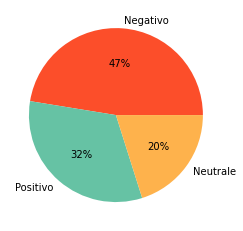

In [31]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df1["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')

plt.savefig("img/sentiment_analysis/kc1_pieplt.png")
plt.show()

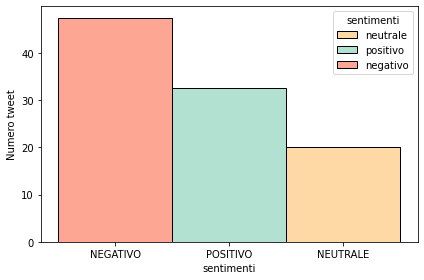

In [32]:
sns.set_palette("Set2")
colors = ['#fc4e2a', "#66c2a4", '#feb24c']
sns.histplot(x="sentimenti", data=df1, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('img/sentiment_analysis/kc1_barplt.png')
plt.show()


In [33]:
tok_pos = ' '.join(df1[df1['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
tok_pos

['hln',
 'legal',
 'analyst',
 'joeyjacksonesq',
 'say',
 'call',
 'testimony',
 'performance',
 'looking',
 'fact',
 'think',
 'stating',
 'large',
 'measure',
 'largely',
 'corroborated',
 'seen',
 'link',
 'judgement',
 'uk',
 'libel',
 'trial',
 'depp',
 'v',
 'sun',
 'anyone',
 'interested',
 'case',
 'interesting',
 'info',
 'face',
 'spokesperson',
 'cosmetic',
 'brand',
 'l',
 'oreal',
 'definitely',
 'going',
 'make',
 'sure',
 'face',
 'fine',
 'money',
 'maker',
 'let',
 'known',
 'light',
 'shine',
 'speaks',
 'truth',
 'true',
 'activist',
 'civil',
 'right',
 'drproudman',
 'america',
 'evidence',
 'jury',
 'call',
 'shot',
 'uk',
 'trial',
 'ghetto',
 'welcome',
 'america',
 'camille',
 'vasquez',
 'amazing',
 'today',
 'beautiful',
 '😭',
 'yas',
 'bish',
 'slayy',
 'pay',
 'lawyer',
 'pay',
 'security',
 'pay',
 'pr',
 'pay',
 'lot',
 'fee',
 'clear',
 'name',
 'total',
 'u',
 'talking',
 'ofc',
 'spent',
 'able',
 'catch',
 'sleeping',
 'camille',
 'cat',
 'playing',
 

In [34]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        212
depp         132
witness      102
johnny        88
friend        88
testimony     83
heard         80
case          75
team          75
make          74
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

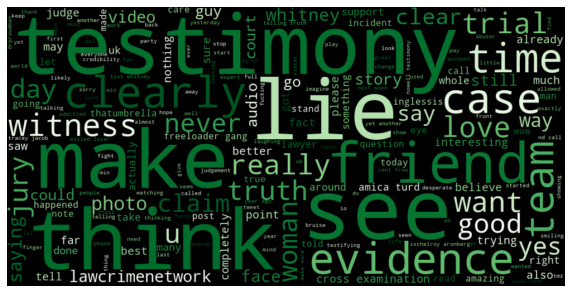

In [35]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df1
words = ' '.join([word for word in df1[df1['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/kc1_wordcloud_pos.jpg')
plt.axis('off')

In [36]:
tok_neg= ' '.join(df1[df1['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
tok_neg

['newsweek',
 'depp',
 'testimony',
 'damning',
 'sorry',
 'chose',
 'drag',
 'slim',
 'yet',
 'court',
 'cruel',
 'imo',
 'unflattering',
 'publicity',
 'time',
 'grow',
 'steve',
 '🙄',
 'sunstroke',
 'house',
 'msg',
 'amber',
 'speak',
 'appears',
 'violence',
 'abuse',
 'side',
 'knew',
 'lying',
 'sunstroke',
 'house',
 'wanted',
 'fair',
 'trial',
 'testified',
 'abuse',
 'appears',
 'way',
 'street',
 'marriage',
 'read',
 'tweet',
 'earthglows',
 'total',
 'silliness',
 'doubt',
 'violent',
 'flew',
 'window',
 'ty',
 'tweet',
 'receipt',
 '⚖️',
 'proof',
 'entire',
 'fictitious',
 'abuse',
 'story',
 'amber',
 'heard',
 'mere',
 'extortion',
 'johnny',
 'spoke',
 'tune',
 'right',
 'lawcrimenetwork',
 'discus',
 'michel',
 'bryant',
 'thelegaledg',
 'murder',
 'trial',
 'prepare',
 'return',
 'next',
 'wee',
 'claracluck',
 'jakeyarnett',
 'bostonian',
 'drproudman',
 'abuser',
 'alcoholic',
 'however',
 'defer',
 'expert',
 'men',
 'alcohol',
 'problem',
 'six',
 'time',
 'li

In [37]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber        325
heard        193
johnny       186
depp         144
witness      144
evidence     134
abuse        113
time         111
testimony    107
abuser       100
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

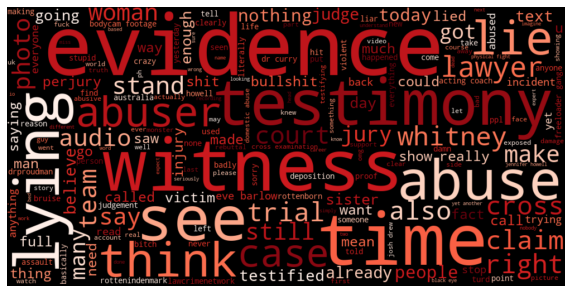

In [38]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df1
words = ' '.join([word for word in df1[df1['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='Reds_r', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/kc1_wordcloud_negativo.png')
plt.axis('off')

In [39]:
tok_neu= ' '.join(df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['elaine',
 'opening',
 'statement',
 'smeared',
 'making',
 'rambling',
 'reception',
 'carrying',
 'elaine',
 'opening',
 'statement',
 'smeared',
 'making',
 'rambling',
 'reception',
 'carrying',
 'elaine',
 'opening',
 'statement',
 'smeared',
 'making',
 'rambling',
 'reception',
 'carrying',
 'issac',
 'baruch',
 'lady',
 'gentleman',
 '😂',
 '👏🏻',
 'shout',
 'andysignore',
 'clip',
 'popcornedplanet',
 '💩🤮🤡⚰️🔚',
 'johnny',
 'depp',
 'need',
 'more…',
 'amber',
 'heard',
 'dna',
 'test',
 'came',
 'back',
 'stool',
 'le',
 '💩',
 'amber',
 'heard',
 'still',
 'career',
 'johnny',
 'depp',
 'calling',
 'middle',
 'finger',
 'little',
 'richard',
 'johnny',
 'depp',
 'thing',
 '😂',
 'johnny',
 'depp',
 'trial',
 'outtake',
 'priceless',
 'nessaaaevans',
 'gellertdepp',
 'quickly',
 'amber',
 'heard',
 'heals',
 'literally',
 'every',
 'single',
 'statement',
 'testimony',
 'given',
 'different',
 'utterly',
 'past',
 'present',
 'future',
 'oh',
 'trying',
 'pas',
 'pic',
 '😂',
 'gi

In [40]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

amber             455
heard             280
courttv           237
johnny            215
depp              208
chanleycourttv    172
witness           146
dr                144
trial             139
time              136
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

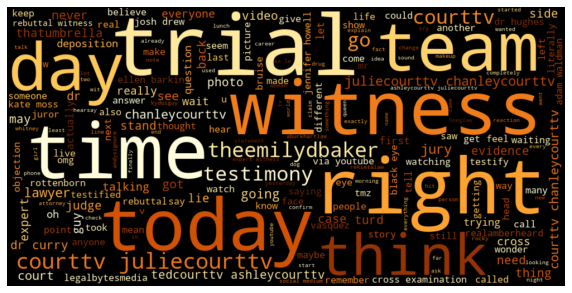

In [41]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df
words = ' '.join([word for word in df[df['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/kc1_wc_neu.png')
plt.axis('off')

# COMUNITÀ 2

In [42]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df2 = pd.read_csv('data/df_kclique_coms_2.csv')
del df2['Unnamed: 0']

In [43]:
df2

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,Unnamed: 0.1,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f
0,2022-05-20,1138416104,farrisflagg,Farris Flagg,brijh justdoodirty momofpgh thesistahchick chr...,[],1,0,3,johnnydepp theview we thecrew johnnydeppamber...,"[{'screen_name': 'brijh', 'name': '#BrittFit50...",NaN,"['brijh', 'justdoodirty', 'momofpgh', 'thesist...",1,22,192,7.772727,NaN
1,2022-05-20,1348812771920650241,justdoodirty3,justdoodirty2,thesistahchick momofpgh farrisflagg brijh chri...,[],1,0,3,theview johnnydeppamberheardtrial,"[{'screen_name': 'TheSistahChick', 'name': 'Th...",NaN,"['thesistahchick', 'momofpgh', 'farrisflagg', ...",1,19,177,8.368421,NaN
2,2022-05-20,1348812771920650241,justdoodirty3,justdoodirty2,following either … care,[],0,0,2,johnnydeppamberheardtrial theview,[],NaN,"['following', 'either', '…', 'care']",1,4,23,5.000000,NaN


In [44]:
df2['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df2['tweet'].astype(str)]
df2['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df2['tweet'].astype(str)]
df2['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df2['tweet'].astype(str)]
df2['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df2['tweet'].astype(str)]

In [45]:
df2

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos
0,2022-05-20,1138416104,farrisflagg,Farris Flagg,brijh justdoodirty momofpgh thesistahchick chr...,[],1,0,3,johnnydepp theview we thecrew johnnydeppamber...,...,"['brijh', 'justdoodirty', 'momofpgh', 'thesist...",1,22,192,7.772727,NaN,0.6705,0.0,0.784,0.216
1,2022-05-20,1348812771920650241,justdoodirty3,justdoodirty2,thesistahchick momofpgh farrisflagg brijh chri...,[],1,0,3,theview johnnydeppamberheardtrial,...,"['thesistahchick', 'momofpgh', 'farrisflagg', ...",1,19,177,8.368421,NaN,0.4215,0.0,0.865,0.135
2,2022-05-20,1348812771920650241,justdoodirty3,justdoodirty2,following either … care,[],0,0,2,johnnydeppamberheardtrial theview,...,"['following', 'either', '…', 'care']",1,4,23,5.000000,NaN,0.4939,0.0,0.385,0.615


In [46]:
#imposto le soglie
df2['sentimenti']=''
df2.loc[df.compound >= 0.01,'sentimenti']='POSITIVO'
df2.loc[df.compound == 0,'sentimenti']='NEUTRALE'
df2.loc[df.compound <= -0.01,'sentimenti']='NEGATIVO'

In [47]:
df2['tweet']

0    brijh justdoodirty momofpgh thesistahchick chr...
1    thesistahchick momofpgh farrisflagg brijh chri...
2                              following either … care
Name: tweet, dtype: object

In [48]:
df2["sentimenti"].value_counts()

NEUTRALE    3
Name: sentimenti, dtype: int64

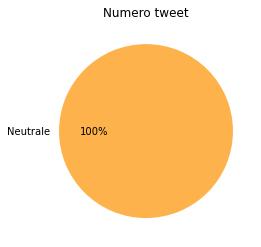

In [49]:
colors = ['#feb24c']
labels = ['Neutrale']
data = df2["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')
plt.savefig('img/sentiment_analysis/kc2_pieplt.png')
plt.title("Numero tweet")
plt.show()

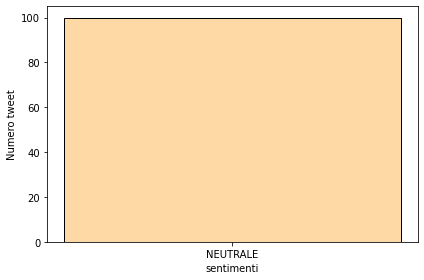

In [50]:

colors = ['#feb24c']
#labels = ['negativo', 'positivo', 'neutrale']
sns.histplot(x="sentimenti", data=df2, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.ylabel("Numero tweet")
plt.tight_layout()
plt.savefig('img/sentiment_analysis/kc2_barplt.png')
plt.show()

In [51]:
tok_neu= ' '.join(df2[df2['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['brijh',
 'justdoodirty',
 'momofpgh',
 'thesistahchick',
 'chrissysblog',
 'luvwinsresist',
 'glamorkt',
 'rettypetty',
 'liveonthechat',
 'jimmiemckinnon',
 'clady',
 'tclarkusa',
 'sunny',
 'abc',
 'danabrams',
 'yes',
 'come',
 'long',
 'way',
 'jump',
 'street',
 'thecrew',
 'thesistahchick',
 'momofpgh',
 'farrisflagg',
 'brijh',
 'chrissysblog',
 'luvwinsresist',
 'glamorkt',
 'rettypetty',
 'liveonthechat',
 'jimmiemckinnon',
 'clady',
 'tclarkusa',
 'sunny',
 'abc',
 'danabrams',
 'far',
 'sexism',
 'american',
 '🇺🇸…',
 'following',
 'either',
 '…',
 'care']

In [52]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

brijh             2
momofpgh          2
thesistahchick    2
chrissysblog      2
luvwinsresist     2
glamorkt          2
rettypetty        2
liveonthechat     2
jimmiemckinnon    2
clady             2
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

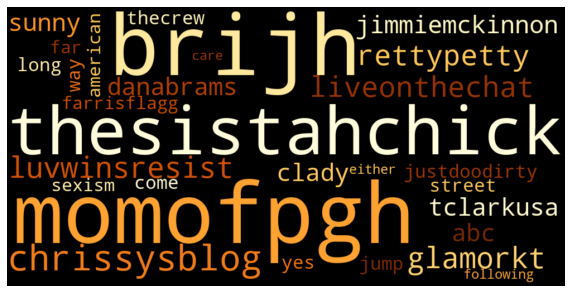

In [53]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df2
words = ' '.join([word for word in df2[df2['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/kc2_wc_neu.png')
plt.axis('off')

# COMUNITÀ 3

In [54]:
#carico il dataset con i tweet puliti e le analisi linguistiche effettuate nel preprocessing 
df3 = pd.read_csv('data/df_kclique_coms_3.csv')
del df3['Unnamed: 0']

In [55]:
df3

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,Unnamed: 0.1,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f
0,2022-05-04,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,😂😂😂🤣🤣😂😂 supporter think dr hughes board cert m...,[],5,1,20,istandwithamberheard johnnydeppvsamberheard j...,[],NaN,"['😂😂😂🤣🤣😂😂', 'supporter', 'think', 'dr', 'hughe...",1,11,71,5.545455,NaN
1,2022-05-04,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,dr hughes regurgitating someone else fact reme...,[],1,5,30,amberheard johnnydeppvsamberheard johnnydeppa...,[],NaN,"['dr', 'hughes', 'regurgitating', 'someone', '...",1,8,57,6.250000,NaN
2,2022-05-14,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,wrong pr guy working overtime 🙄🙄🙄🙄,[],0,1,3,amberheard johnnydeppamberheardtrial johnnyde...,[],NaN,"['wrong', 'pr', 'guy', 'working', 'overtime', ...",1,6,34,4.833333,NaN
3,2022-05-13,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,lol picture posted uk paper ok courttv 🙄🙄🙄🙄,"[{'screen_name': 'courttv', 'name': 'court tv'...",0,1,2,johnnydeppamberheardtrial johnnydeppvamberhea...,[],NaN,"['lol', 'picture', 'posted', 'uk', 'paper', 'o...",1,8,43,4.500000,NaN
4,2022-05-13,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,body language word v action,[],1,0,5,johnnydeppamberheardtrial johnnydeppvamberhea...,[],NaN,"['body', 'language', 'word', 'v', 'action']",1,5,27,4.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,[],563.0,"['people', 'judy', 'saying', 'wasnt', 'partyin...",1,15,96,5.466667,NaN
892,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,[],1265.0,"['people', 'judy', 'saying', 'wasnt', 'partyin...",1,15,96,5.466667,NaN
893,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,[],1334.0,"['people', 'judy', 'saying', 'wasnt', 'partyin...",1,15,96,5.466667,NaN
894,2022-06-12,978434173819064320,barbaraem77,Bunny Babs,theemilydbaker chance court transcript recap s...,[],0,0,0,deppheardtrial,[],1863.0,"['theemilydbaker', 'chance', 'court', 'transcr...",1,13,84,5.538462,NaN


In [56]:
df3['compound'] = [sentiment.polarity_scores(x)['compound'] for x in df3['tweet'].astype(str)]
df3['neg'] = [sentiment.polarity_scores(x)['neg'] for x in df3['tweet'].astype(str)]
df3['neu'] = [sentiment.polarity_scores(x)['neu'] for x in df3['tweet'].astype(str)]
df3['pos'] = [sentiment.polarity_scores(x)['pos'] for x in df3['tweet'].astype(str)]

In [57]:
df3

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,token,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos
0,2022-05-04,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,😂😂😂🤣🤣😂😂 supporter think dr hughes board cert m...,[],5,1,20,istandwithamberheard johnnydeppvsamberheard j...,...,"['😂😂😂🤣🤣😂😂', 'supporter', 'think', 'dr', 'hughe...",1,11,71,5.545455,NaN,-0.3400,0.243,0.541,0.216
1,2022-05-04,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,dr hughes regurgitating someone else fact reme...,[],1,5,30,amberheard johnnydeppvsamberheard johnnydeppa...,...,"['dr', 'hughes', 'regurgitating', 'someone', '...",1,8,57,6.250000,NaN,0.0000,0.000,1.000,0.000
2,2022-05-14,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,wrong pr guy working overtime 🙄🙄🙄🙄,[],0,1,3,amberheard johnnydeppamberheardtrial johnnyde...,...,"['wrong', 'pr', 'guy', 'working', 'overtime', ...",1,6,34,4.833333,NaN,-0.4767,0.383,0.617,0.000
3,2022-05-13,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,lol picture posted uk paper ok courttv 🙄🙄🙄🙄,"[{'screen_name': 'courttv', 'name': 'court tv'...",0,1,2,johnnydeppamberheardtrial johnnydeppvamberhea...,...,"['lol', 'picture', 'posted', 'uk', 'paper', 'o...",1,8,43,4.500000,NaN,0.6124,0.000,0.545,0.455
4,2022-05-13,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,body language word v action,[],1,0,5,johnnydeppamberheardtrial johnnydeppvamberhea...,...,"['body', 'language', 'word', 'v', 'action']",1,5,27,4.600000,NaN,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,...,"['people', 'judy', 'saying', 'wasnt', 'partyin...",1,15,96,5.466667,NaN,0.1571,0.121,0.723,0.156
892,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,...,"['people', 'judy', 'saying', 'wasnt', 'partyin...",1,15,96,5.466667,NaN,0.1571,0.121,0.723,0.156
893,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,...,"['people', 'judy', 'saying', 'wasnt', 'partyin...",1,15,96,5.466667,NaN,0.1571,0.121,0.723,0.156
894,2022-06-12,978434173819064320,barbaraem77,Bunny Babs,theemilydbaker chance court transcript recap s...,[],0,0,0,deppheardtrial,...,"['theemilydbaker', 'chance', 'court', 'transcr...",1,13,84,5.538462,NaN,0.2500,0.000,0.833,0.167


In [58]:
#imposto le soglie
df3['sentimenti']=''
df3.loc[df.compound >= 0.001,'sentimenti']='POSITIVO'
df3.loc[df.compound == 0,'sentimenti']='NEUTRALE'
df3.loc[df.compound <= -0.001,'sentimenti']='NEGATIVO'

In [59]:
df3

,date,user_id,username,name,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,...,n_frasi,n_parole_uniche,n_lettere,n_media_parole,word_f,compound,neg,neu,pos,sentimenti
0,2022-05-04,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,😂😂😂🤣🤣😂😂 supporter think dr hughes board cert m...,[],5,1,20,istandwithamberheard johnnydeppvsamberheard j...,...,1,11,71,5.545455,NaN,-0.3400,0.243,0.541,0.216,NEUTRALE
1,2022-05-04,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,dr hughes regurgitating someone else fact reme...,[],1,5,30,amberheard johnnydeppvsamberheard johnnydeppa...,...,1,8,57,6.250000,NaN,0.0000,0.000,1.000,0.000,NEUTRALE
2,2022-05-14,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,wrong pr guy working overtime 🙄🙄🙄🙄,[],0,1,3,amberheard johnnydeppamberheardtrial johnnyde...,...,1,6,34,4.833333,NaN,-0.4767,0.383,0.617,0.000,NEUTRALE
3,2022-05-13,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,lol picture posted uk paper ok courttv 🙄🙄🙄🙄,"[{'screen_name': 'courttv', 'name': 'court tv'...",0,1,2,johnnydeppamberheardtrial johnnydeppvamberhea...,...,1,8,43,4.500000,NaN,0.6124,0.000,0.545,0.455,NEUTRALE
4,2022-05-13,1518917881119059968,simplyslj,Simply SLJ 🏴‍☠️🏴‍☠️🏴‍☠️,body language word v action,[],1,0,5,johnnydeppamberheardtrial johnnydeppvamberhea...,...,1,5,27,4.600000,NaN,0.0000,0.000,1.000,0.000,NEGATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,...,1,15,96,5.466667,NaN,0.1571,0.121,0.723,0.156,NEGATIVO
892,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,...,1,15,96,5.466667,NaN,0.1571,0.121,0.723,0.156,POSITIVO
893,2022-06-06,1469091555206123520,karate_kaninen,karatekaninen,people judy saying wasnt partying try shift fo...,[],1,0,0,deppvsheard deppheardtrial,...,1,15,96,5.466667,NaN,0.1571,0.121,0.723,0.156,POSITIVO
894,2022-06-12,978434173819064320,barbaraem77,Bunny Babs,theemilydbaker chance court transcript recap s...,[],0,0,0,deppheardtrial,...,1,13,84,5.538462,NaN,0.2500,0.000,0.833,0.167,POSITIVO


In [60]:
df3["sentimenti"].value_counts()

NEGATIVO    331
POSITIVO    298
NEUTRALE    267
Name: sentimenti, dtype: int64

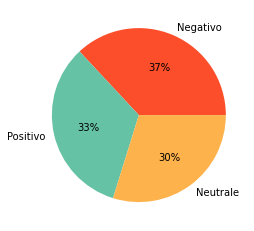

In [61]:
colors = ['#fc4e2a', "#66c2a4",'#feb24c']
labels = ['Negativo', 'Positivo', 'Neutrale']
data = df3["sentimenti"].value_counts()
plt.pie(data, colors = colors, labels = labels, autopct='%.0f%%')
plt.savefig('img/sentiment_analysis/kc3_pieplt.png')
plt.show()

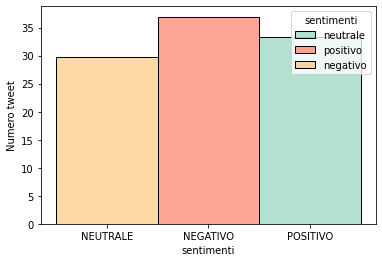

In [62]:

colors = ['#feb24c', '#fc4e2a', "#66c2a4"]
sns.histplot(x="sentimenti", data=df3, hue = "sentimenti", legend = False, stat = 'percent', palette = colors)
plt.legend(['neutrale', 'positivo', 'negativo']).set_title('sentimenti')
plt.ylabel("Numero tweet")
plt.savefig('img/sentiment_analysis/kc3_barplt.png')
plt.show()

In [63]:
tok_pos = ' '.join(df3[df3['sentimenti']=='POSITIVO']['tweet'].astype(str)).split()
tok_pos

['thatumbrella',
 'seriously',
 'never',
 'forgot',
 'someone',
 'supposedly',
 'noone',
 'source',
 'check',
 'anymore',
 'deep',
 'trial',
 'stopped',
 'caring',
 'tyhe',
 'truth',
 'spread',
 'rumour',
 'truth',
 'always',
 'enough',
 'stop',
 'spreading',
 'rumour',
 'kattenbarge',
 'think',
 'lot',
 'youtubers',
 'really',
 'care',
 'win',
 'getting',
 'subscriber',
 'money',
 'tip',
 'jar',
 'pay',
 'fan',
 'win',
 'meja',
 'sang',
 '🎵its',
 'bout',
 'money',
 'lying',
 'liar',
 'lie…🍿🍿🍿🍿',
 'legalbytesmedia',
 'theemilydbaker',
 'month',
 'sued',
 'nada',
 'someone',
 'else',
 'fault',
 'legalbytesmedia',
 'theemilydbaker',
 'really',
 'inappropriate',
 'camille',
 'queen',
 'actually',
 'far',
 'better',
 'thought',
 'beginning',
 'cross',
 'examination',
 'took',
 'pic',
 'nothing',
 'relevant',
 'allegation',
 'legalbytesmedia',
 'theemilydbaker',
 'bc',
 'sooooo',
 'fucking',
 'scared',
 'amber',
 'thats',
 'legalbytesmedia',
 'theemilydbaker',
 'vacation',
 'legalbytesmedia

In [64]:

freqdist = FreqDist(tok_pos).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

theemilydbaker     120
legalbytesmedia     95
heard               50
amber               48
trial               37
people              34
lawyer              28
make                26
johnny              25
depp                24
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

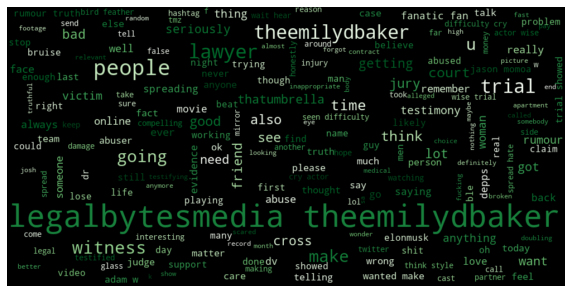

In [65]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])
tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='POSITIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=150, background_color = 'black', colormap='Greens', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/kc3_wc_pos.png')
plt.axis('off')

In [66]:
tok_neg= ' '.join(df3[df3['sentimenti']=='NEGATIVO']['tweet'].astype(str)).split()
tok_neg

['body',
 'language',
 'word',
 'v',
 'action',
 'seriously',
 'never',
 'forgot',
 'someone',
 'supposedly',
 'noone',
 'source',
 'check',
 'anymore',
 'deep',
 'trial',
 'stopped',
 'caring',
 'tyhe',
 'truth',
 'spread',
 'rumour',
 'truth',
 'always',
 'enough',
 'stop',
 'spreading',
 'rumour',
 'redkml',
 'seriously',
 'people',
 'noone',
 'source',
 'check',
 'anymore',
 'deep',
 'trial',
 'stopped',
 'caring',
 'tyhe',
 'truth',
 'spread',
 'rumour',
 'truth',
 'always',
 'enough',
 'kattenbarge',
 'think',
 'lot',
 'youtubers',
 'really',
 'care',
 'win',
 'getting',
 'subscriber',
 'money',
 'tip',
 'jar',
 'pay',
 'fan',
 'win',
 'meja',
 'sang',
 '🎵its',
 'bout',
 'money',
 'believe',
 'lying',
 'liar',
 'lie',
 'legalbytesmedia',
 'theemilydbaker',
 'going',
 'promise',
 'pay',
 'mortgage',
 'bank',
 'since',
 'work',
 'legalbytesmedia',
 'theemilydbaker',
 'produce',
 'metadata',
 'sanction',
 'motion',
 'her…',
 'ok',
 'eve',
 'lying',
 'liar',
 'lie',
 '🤣🤣🤣😂😂',
 'theem

In [67]:
freqdist = FreqDist(tok_neg).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

theemilydbaker     134
legalbytesmedia     97
johnny              43
depp                43
heard               41
people              39
amber               39
trial               35
court               29
lawyer              24
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

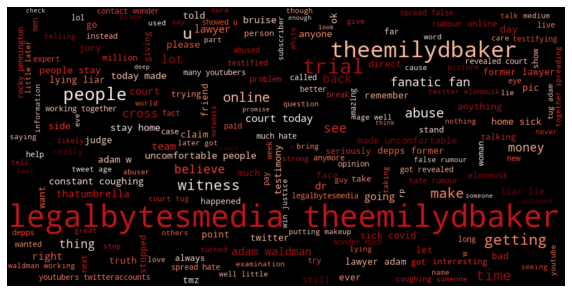

In [68]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='NEGATIVO']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=20, max_font_size=150, background_color = 'black', colormap='Reds', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/kc3_wc_neg.png')
plt.axis('off')

In [69]:

tok_neu= ' '.join(df3[df3['sentimenti']=='NEUTRALE']['tweet'].astype(str)).split()
tok_neu

['😂😂😂🤣🤣😂😂',
 'supporter',
 'think',
 'dr',
 'hughes',
 'board',
 'cert',
 'matter',
 'shit',
 'show',
 'testimony',
 'dr',
 'hughes',
 'regurgitating',
 'someone',
 'else',
 'fact',
 'remember',
 'report',
 'wrong',
 'pr',
 'guy',
 'working',
 'overtime',
 '🙄🙄🙄🙄',
 'lol',
 'picture',
 'posted',
 'uk',
 'paper',
 'ok',
 'courttv',
 '🙄🙄🙄🙄',
 'tt',
 'er',
 'going',
 'field',
 'day',
 'legalbytesmedia',
 'theemilydbaker',
 'coming',
 '🍿🍿🍿🍿',
 'legalbytesmedia',
 'theemilydbaker',
 'according',
 'evidence',
 'johnny',
 'depps',
 'lawyer',
 'showed',
 'court',
 'today',
 'amber',
 'heard',
 'male',
 'seriously',
 'see',
 'misstake',
 'cross',
 'thinking',
 'lawyer',
 'bad',
 'lie',
 'found…',
 '😂😂🤣🤣',
 'legalbytesmedia',
 'theemilydbaker',
 '🍿🍿🍿🍿🍿🍿🍿',
 'lying',
 'liar',
 'lie',
 'always',
 'caught',
 'legalbytesmedia',
 'theemilydbaker',
 'wait',
 'hear',
 'lumberlaw',
 'kyduiguy',
 'gentleman',
 'giving',
 'jury',
 'tea',
 'legalbytesmedia',
 'theemilydbaker',
 'ahhh',
 'shit',
 'play',
 'v

In [70]:

freqdist = FreqDist(tok_neu).most_common(10)
freqdistPlot = pd.Series(dict(freqdist))
freqdistPlot

theemilydbaker     104
legalbytesmedia     76
heard               44
amber               40
johnny              31
lawyer              30
depp                30
people              27
trial               27
think               20
dtype: int64

(-0.5, 999.5, 499.5, -0.5)

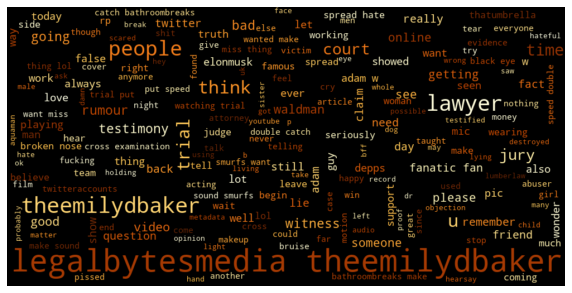

In [71]:
stopw2 = stopwords.words('english') 
stopw2.extend(['amber', 'heard', 'johnny', 'depp', 'camille', 'elaine'])

tweet_df = df3
words = ' '.join([word for word in df3[df3['sentimenti']=='NEUTRALE']['tweet'].astype(str)])
word_cloud = WordCloud(width=1000, height=500, random_state=25, max_font_size=150, background_color = 'black', colormap='YlOrBr', stopwords = stopw2).generate(words)

fig, ax = plt.subplots(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.savefig('img/sentiment_analysis/kc3_wc_neu.png')
plt.axis('off')

In [72]:
df.to_csv('data/df_sentiment_coms_kclique.csv')